In [1]:
import numpy as np
import numba as nb

Training an Autoencoder
---

In this file I show how to build and train an autoencoder using my liblary $NeuralNet.py$ on example of load_digits dataset.    
$NeuralNet.py$ is where I implemented a code that allows to create a fully connected Neural Networkhat, that 
can be optimzed using Stochastic Gradient Descent.   

---

1. Firstly I upload the activation functions and NN class:

In [2]:
from NeuralNet import leaky_relu
from NeuralNet import sigmoid
from NeuralNet import tanh
from NeuralNet import NN

2. Then I upload and pre-process the data on which I will train my model on:

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load digits (8x8 grayscale images)
digits = load_digits()
X = digits.data  # shape: (1797, 64)

# Normalize pixel values to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

3. Setting the Autoencoder's architecture and training it:

In [3]:
# ========== Create the Autoencoder ==========
autoencoder = NN(input_size=64)

# -------- Encoder --------
autoencoder.add_layer(50, activation_function=tanh)
autoencoder.add_layer(40, activation_function=tanh)
autoencoder.add_layer(32, activation_function=tanh)  # Bottleneck

# -------- Decoder --------
autoencoder.add_layer(40, activation_function=tanh)
autoencoder.add_layer(50, activation_function=tanh)
autoencoder.add_layer(64, activation_function=sigmoid)  # Output layer

# ========== Training ==========
n_epochs = 300
learning_rate = 0.01

for epoch in range(n_epochs):
    losses = []
    for x in X_train:
        out = autoencoder._predict(x)
        loss = autoencoder.backward(x, lr=learning_rate)  # x == y_true
        losses.append(loss)

    avg_loss = np.mean(losses)
    print(f"Epoch {epoch+1}/{n_epochs} - Loss: {avg_loss:.5f}")


Epoch 1/300 - Loss: 6.29902
Epoch 2/300 - Loss: 4.82729
Epoch 3/300 - Loss: 4.62208
Epoch 4/300 - Loss: 4.56548
Epoch 5/300 - Loss: 4.38819
Epoch 6/300 - Loss: 4.00403
Epoch 7/300 - Loss: 3.97062
Epoch 8/300 - Loss: 3.89043
Epoch 9/300 - Loss: 3.83326
Epoch 10/300 - Loss: 3.80749
Epoch 11/300 - Loss: 3.75643
Epoch 12/300 - Loss: 3.72107
Epoch 13/300 - Loss: 3.69749
Epoch 14/300 - Loss: 3.67167
Epoch 15/300 - Loss: 3.65249
Epoch 16/300 - Loss: 3.62474
Epoch 17/300 - Loss: 3.60107
Epoch 18/300 - Loss: 3.25402
Epoch 19/300 - Loss: 2.95682
Epoch 20/300 - Loss: 2.94037
Epoch 21/300 - Loss: 2.92156
Epoch 22/300 - Loss: 2.90409
Epoch 23/300 - Loss: 2.88867
Epoch 24/300 - Loss: 2.85666
Epoch 25/300 - Loss: 2.83800
Epoch 26/300 - Loss: 2.81310
Epoch 27/300 - Loss: 2.79671
Epoch 28/300 - Loss: 2.78853
Epoch 29/300 - Loss: 2.77458
Epoch 30/300 - Loss: 2.76701
Epoch 31/300 - Loss: 2.75604
Epoch 32/300 - Loss: 2.74902
Epoch 33/300 - Loss: 2.73438
Epoch 34/300 - Loss: 2.72630
Epoch 35/300 - Loss: 2.

 Loss evaluation:
--
Here, I ploted the loss of the training by epoch

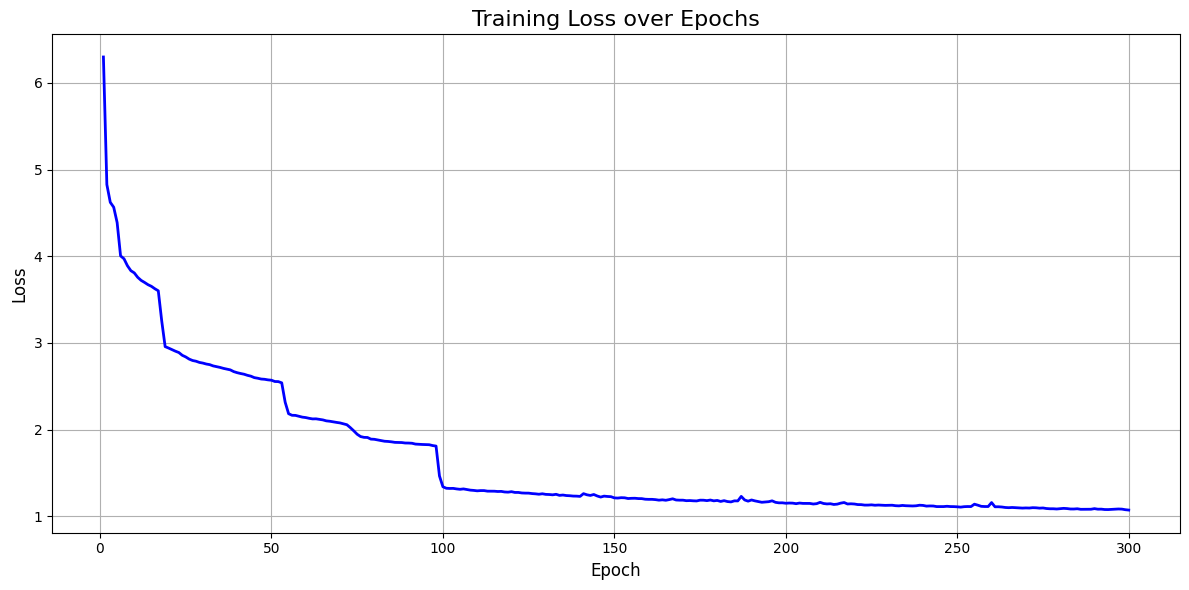

In [25]:
import matplotlib.pyplot as plt

# Loss values for each epoch
loss_values = [
    6.29902, 4.82729, 4.62208, 4.56548, 4.38819, 4.00403, 3.97062, 3.89043, 3.83326, 3.80749,
    3.75643, 3.72107, 3.69749, 3.67167, 3.65249, 3.62474, 3.60107, 3.25402, 2.95682, 2.94037,
    2.92156, 2.90409, 2.88867, 2.85666, 2.83800, 2.81310, 2.79671, 2.78853, 2.77458, 2.76701,
    2.75604, 2.74902, 2.73438, 2.72630, 2.71712, 2.70596, 2.69753, 2.68868, 2.66853, 2.65626,
    2.64662, 2.63866, 2.62573, 2.61602, 2.59914, 2.59219, 2.58295, 2.57996, 2.57322, 2.56923,
    2.55440, 2.55329, 2.53907, 2.31566, 2.18287, 2.16462, 2.16343, 2.15293, 2.14333, 2.13829,
    2.12953, 2.12280, 2.12370, 2.11717, 2.11136, 2.10028, 2.09585, 2.08880, 2.08241, 2.07651,
    2.06585, 2.05569, 2.02239, 1.98528, 1.94564, 1.91916, 1.90982, 1.90861, 1.88972, 1.88753,
    1.87941, 1.87247, 1.86506, 1.86266, 1.85826, 1.85207, 1.85156, 1.85000, 1.84470, 1.84423,
    1.84182, 1.83226, 1.82943, 1.82777, 1.82593, 1.82502, 1.81529, 1.80935, 1.46428, 1.33988,
    1.32265, 1.32037, 1.32117, 1.31494, 1.31051, 1.31496, 1.30803, 1.30091, 1.29771, 1.29290,
    1.29576, 1.29566, 1.28917, 1.28939, 1.28858, 1.28521, 1.28642, 1.27972, 1.27767, 1.28308,
    1.27436, 1.27448, 1.26837, 1.26657, 1.26626, 1.26120, 1.25820, 1.25357, 1.25904, 1.25197,
    1.25048, 1.24679, 1.25276, 1.24056, 1.24447, 1.23840, 1.23634, 1.23250, 1.23167, 1.22862,
    1.26040, 1.24710, 1.23975, 1.25069, 1.23352, 1.22094, 1.23174, 1.22782, 1.22553, 1.21138,
    1.20938, 1.21384, 1.21247, 1.20411, 1.20648, 1.20727, 1.20351, 1.20286, 1.19614, 1.19454,
    1.19463, 1.19132, 1.18530, 1.18912, 1.18407, 1.19174, 1.20095, 1.18720, 1.18509, 1.18519,
    1.17920, 1.18074, 1.17785, 1.17632, 1.18511, 1.18469, 1.17987, 1.18664, 1.17739, 1.18208,
    1.17050, 1.17954, 1.16911, 1.16512, 1.17720, 1.17654, 1.22867, 1.18754, 1.17367, 1.18743,
    1.17696, 1.16844, 1.16080, 1.16407, 1.16760, 1.17754, 1.16014, 1.15425, 1.15462, 1.14960,
    1.15204, 1.15096, 1.14468, 1.15173, 1.14781, 1.14808, 1.14753, 1.14076, 1.14483, 1.16007,
    1.14671, 1.14179, 1.14398, 1.13562, 1.13939, 1.15090, 1.15800, 1.14114, 1.14333, 1.14084,
    1.13427, 1.13356, 1.12825, 1.12853, 1.13122, 1.12656, 1.12906, 1.12674, 1.12502, 1.12643,
    1.12692, 1.12138, 1.11945, 1.12451, 1.12103, 1.11982, 1.11817, 1.12026, 1.12686, 1.12463,
    1.11671, 1.11857, 1.11779, 1.11103, 1.11122, 1.11111, 1.11468, 1.11136, 1.11066, 1.10854,
    1.10495, 1.11004, 1.11178, 1.11120, 1.13883, 1.12722, 1.11395, 1.11182, 1.11174, 1.15752,
    1.10867, 1.10912, 1.10631, 1.10075, 1.09839, 1.10078, 1.09854, 1.09602, 1.09382, 1.09559,
    1.09429, 1.09845, 1.09705, 1.09303, 1.09512, 1.08878, 1.08604, 1.08603, 1.08333, 1.08640,
    1.09065, 1.08820, 1.08334, 1.08316, 1.08600, 1.07971, 1.07961, 1.08062, 1.08049, 1.08743,
    1.08107, 1.08157, 1.07716, 1.07666, 1.07910, 1.08208, 1.08336, 1.08190, 1.07514, 1.07092
]

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(loss_values)+1), loss_values, color='blue', linewidth=2)
plt.title("Training Loss over Epochs", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


The loss of the test set is:

In [26]:
test_losses = []
for x in X_test:
    out = autoencoder._predict(x)
    loss = autoencoder.error(x)  # compare reconstructed x to original x
    test_losses.append(loss)

avg_test_loss = np.mean(test_losses)
print(f"Test Loss: {avg_test_loss:.5f}")


Test Loss: 1.35916


Here I show, how the model deals with example digid from the testset (it has not seen this image during training).

Firstly, I show orginal image, then the compressed version (bottleneck) 
and at the end the reconstructed image:

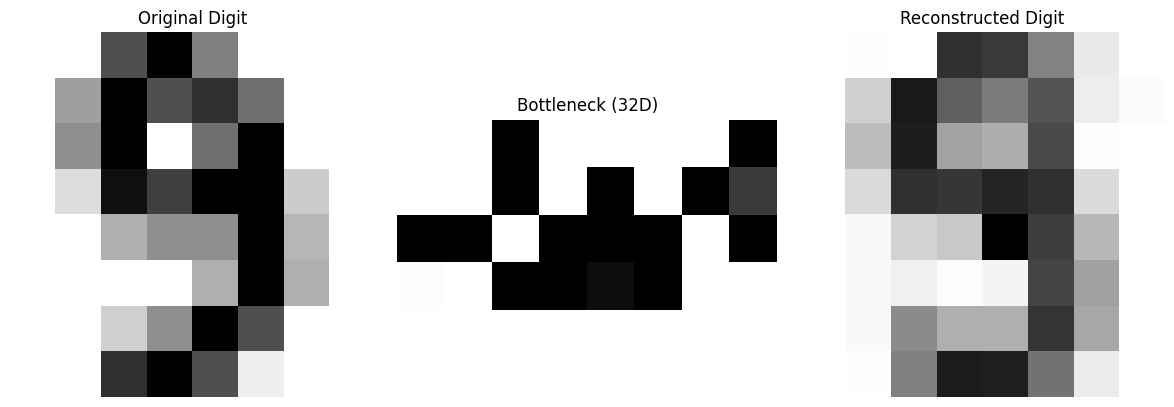

In [27]:
import matplotlib.pyplot as plt

# Select a sample from the test set
sample_idx = 1
x_sample = X_test[sample_idx]

# === Get original image ===
original_image = x_sample.reshape(8, 8)

# === Run through the autoencoder ===
_ = autoencoder._predict(x_sample)  # Forward pass
encoded = autoencoder.activations[3]  # Bottleneck output (32D)
reconstructed = autoencoder.activations[-1].reshape(8, 8)

# === Plotting ===
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Original
axs[0].imshow(original_image, cmap='binary')  # black digit, white background
axs[0].set_title("Original Digit")
axs[0].axis('off')

# Bottleneck
axs[1].imshow(encoded.reshape(4, 8), cmap='binary')  # reshape to visualize
axs[1].set_title("Bottleneck (32D)")
axs[1].axis('off')

# Reconstructed
axs[2].imshow(reconstructed, cmap='binary')
axs[2].set_title("Reconstructed Digit")
axs[2].axis('off')

plt.tight_layout()
plt.show()


Here I save the weights of the model for later use:

In [1]:

# Get weights from each layer (list of lists of arrays)
layer_weights = [layer.get_weights() for layer in autoencoder.layers]

# Convert to numpy object array (this avoids the ValueError)
layer_weights_obj = np.array(layer_weights, dtype=object)

# Now save with pickle allowed
np.save('layer_weights.npy', layer_weights_obj, allow_pickle=True)


NameError: name 'autoencoder' is not defined